# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [97]:
import numpy as np
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

from sklearn.datasets import fetch_openml
data_X, data_Y = fetch_openml('mnist_784', version=1, return_X_y=True)



### Now take a look at the shapes of the X and y matricies 

In [101]:
data_X.shape

(70000, 784)

In [102]:
data_Y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [103]:
X[:36000]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

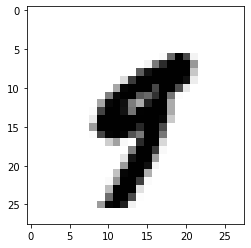

In [104]:
#mport matplotlib
import matplotlib.pyplot as plt
reshaped = X.iloc[36000].values.reshape(28, 28)

plt.imshow(reshaped, cmap=matplotlib.cm.binary, interpolation='nearest')


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [105]:
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [115]:
from sklearn.model_selection import train_test_split

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [116]:
y_train_5 = np.where(y_train == '5', 1, 0)

y_test_5 = np.where(y_test == '5',1, 0)

print(X_train.shape, y_train_5.shape, X_test.shape, y_test_5.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [122]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train_5)
model


C:\Users\Mtime\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [131]:
y_predict = model.predict(X_train)
y_predict[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [133]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [150]:
model1 = Never5Classifier()
model1.fit(X_train)
y_predict_never_5 = model1.predict(X_train)
y_predict_never_5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [151]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
y_predict = model.predict(X_test)

print('Confusion matrix\n', confusion_matrix (y_test_5,y_predict))
print("Accuracy Score:", metrics.accuracy_score(y_test_5, y_predict))
print("F1 Score:", metrics.f1_score(y_test_5, y_predict))
print("Precision Score:", metrics.precision_score(y_test_5, y_predict))
print("Recall Score:", metrics.recall_score(y_test_5, y_predict))
print('\n')
print('Never 5 model')
print('Confusion matrix:\n', confusion_matrix(y_train_5,y_predict_never_5))
print('Precision:', precision_score(y_train_5,y_predict_never_5))
print('Recall:', recall_score(y_train_5,y_predict_never_5))
print('F1 score:', f1_score(y_train_5,y_predict_never_5))

Confusion matrix
 [[9034   74]
 [ 147  745]]
Accuracy Score: 0.9779
F1 Score: 0.8708357685563999
Precision Score: 0.9096459096459096
Recall Score: 0.8352017937219731


Never 5 model
Confusion matrix:
 [[54579     0]
 [ 5421     0]]
Precision: 0.0
Recall: 0.0
F1 score: 0.0


C:\Users\Mtime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

C:\Users\Mtime\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


AUC for our VotingClassifier is: nan


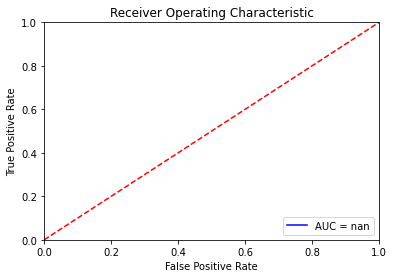

In [166]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import plot_roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our VotingClassifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [162]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC Score:", metrics.roc_auc_score(y_test_5,y_predict))
print("ROC-AUC Score:", metrics.roc_auc_score(y_train_5,y_predict_never_5))

ROC-AUC Score: 0.9135385341029717
ROC-AUC Score: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# LogisticRegression is the better if we see the value matrics 